In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.gaussian_process
import sklearn.neural_network

import warnings
warnings.filterwarnings("ignore")

In [25]:
data = pd.read_csv("student-por.csv", sep=";")
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2   

In [26]:
data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [28]:
correlations = data.corr()['G3']
print("Correlations with target")
print(correlations)

Correlations with target
age          -0.106505
Medu          0.240151
Fedu          0.211800
traveltime   -0.127173
studytime     0.249789
failures     -0.393316
famrel        0.063361
freetime     -0.122705
goout        -0.087641
Dalc         -0.204719
Walc         -0.176619
health       -0.098851
absences     -0.091379
G1            0.826387
G2            0.918548
G3            1.000000
Name: G3, dtype: float64


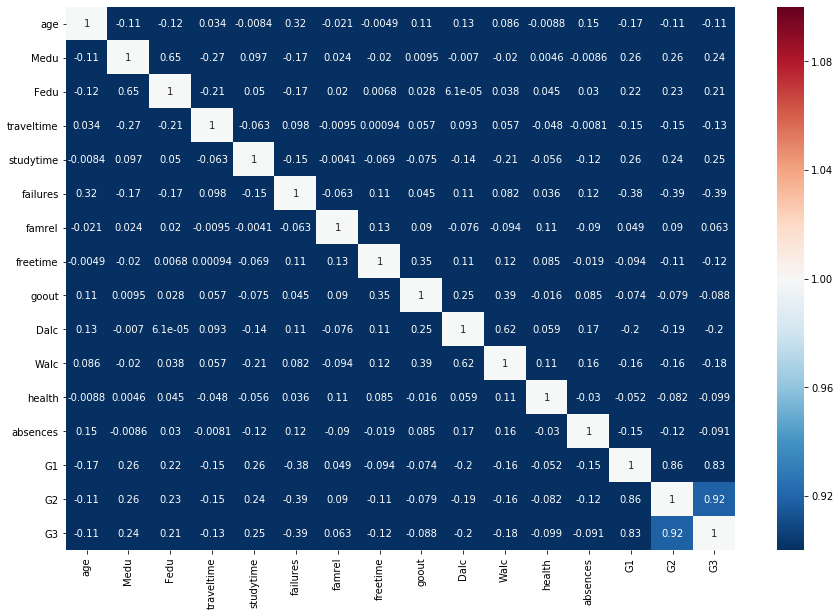

In [29]:
#Correclation
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=0, vmin=1, cmap="RdBu_r")

In [30]:
#Removing Sex column from data set based on reading 2
# data.drop(columns=['sex'], inplace=True)

In [31]:
#Convert columns to numbers using labelEncoding
label_encoding = sklearn.preprocessing.LabelEncoder()
data['school'] = label_encoding.fit(data['school']).transform(data['school'])
data['sex'] = label_encoding.fit(data['sex']).transform(data['sex'])
data['address'] = label_encoding.fit(data['address']).transform(data['address'])
data['famsize'] = label_encoding.fit(data['famsize']).transform(data['famsize'])
data['Pstatus'] = label_encoding.fit(data['Pstatus']).transform(data['Pstatus'])
data['Mjob'] = label_encoding.fit(data['Mjob']).transform(data['Mjob'])
data['Fjob'] = label_encoding.fit(data['Fjob']).transform(data['Fjob'])
data['reason'] = label_encoding.fit(data['reason']).transform(data['reason'])
data['guardian'] = label_encoding.fit(data['guardian']).transform(data['guardian'])
data['schoolsup'] = label_encoding.fit(data['schoolsup']).transform(data['schoolsup'])
data['famsup'] = label_encoding.fit(data['famsup']).transform(data['famsup'])
data['paid'] = label_encoding.fit(data['paid']).transform(data['paid'])
data['activities'] = label_encoding.fit(data['activities']).transform(data['activities'])
data['nursery'] = label_encoding.fit(data['nursery']).transform(data['nursery'])
data['higher'] = label_encoding.fit(data['higher']).transform(data['higher'])
data['internet'] = label_encoding.fit(data['internet']).transform(data['internet'])
data['romantic'] = label_encoding.fit(data['romantic']).transform(data['romantic'])
# data.drop(columns=['school', 'address', 'famsize', 'Pstatus', 'Fjob', 'Mjob', 'reason', 'guardian', 'activities','nursery', 'famsup','schoolsup'], inplace=True)

In [32]:
data.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11  11  
1       5         3      3     1     1       3         2   9  11  11  
2       4         3      2     2     3       3         6  12  13  12  
3       3         2      2     1     1       5         0  14  14  14  
4       4         3      2     1     2       5         0  11  13  13  

[5 rows x 33 columns]

In [33]:
data.describe()

school         sex         age     address     famsize     Pstatus  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     0.348228    0.409861   16.744222    0.696456    0.295840    0.876733   
std      0.476776    0.492187    1.218138    0.460143    0.456771    0.328996   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      1.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob  ...      famrel  \
count  649.000000  649.000000  649.000000  649.000000  ...  649.000000   
mean     2.514638    2.306626    1.941448    2.224961  ...    3.930663   
std      1.134552    1.099931    1.248317    0.863487  ...    0.955717   
min      0.000000    0.000000    0.000000    0.000000  ...    1.000000   
25%      2.000000    1.000000    1.000000    2.000000  ...    4.000000   
50%      2.000000    2.000000    2.000000    2.000000  ...    4.000000   
75%      4.000000    3.000000    3.000000    3.000000  ...    5.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    5.000000   

         freetime       goout        Dalc        Walc      health    absences  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.180277    3.184900    1.502311    2.280431    3.536210    3.659476   
std      1.051093    1.175766    0.924834    1.284380    1.446259    4.640759   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      3.000000    2.000000    1.000000    1.000000    2.000000    0.000000   
50%      3.000000    3.000000    1.000000    2.000000    4.000000    2.000000   
75%      4.000000    4.000000    2.000000    3.000000    5.000000    6.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000   32.000000   

               G1          G2          G3  
count  649.000000  649.000000  649.000000  
mean    11.399076   11.570108   11.906009  
std      2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000  
25%     10.000000   10.000000   10.000000  
50%     11.000000   11.000000   12.000000  
75%     13.000000   13.000000   14.000000  
max     19.000000   19.000000   19.000000  

[8 rows x 33 columns]

In [34]:
correlations = data.corr()['G3']
print("Correlations with target")
print(correlations)

Correlations with target
school       -0.284294
sex          -0.129077
age          -0.106505
address       0.167637
famsize       0.045016
Pstatus      -0.000754
Medu          0.240151
Fedu          0.211800
Mjob          0.148252
Fjob          0.052953
reason        0.124969
guardian     -0.079609
traveltime   -0.127173
studytime     0.249789
failures     -0.393316
schoolsup    -0.066405
famsup        0.059206
paid         -0.054898
activities    0.059791
nursery       0.028752
higher        0.332172
internet      0.150025
romantic     -0.090583
famrel        0.063361
freetime     -0.122705
goout        -0.087641
Dalc         -0.204719
Walc         -0.176619
health       -0.098851
absences     -0.091379
G1            0.826387
G2            0.918548
G3            1.000000
Name: G3, dtype: float64


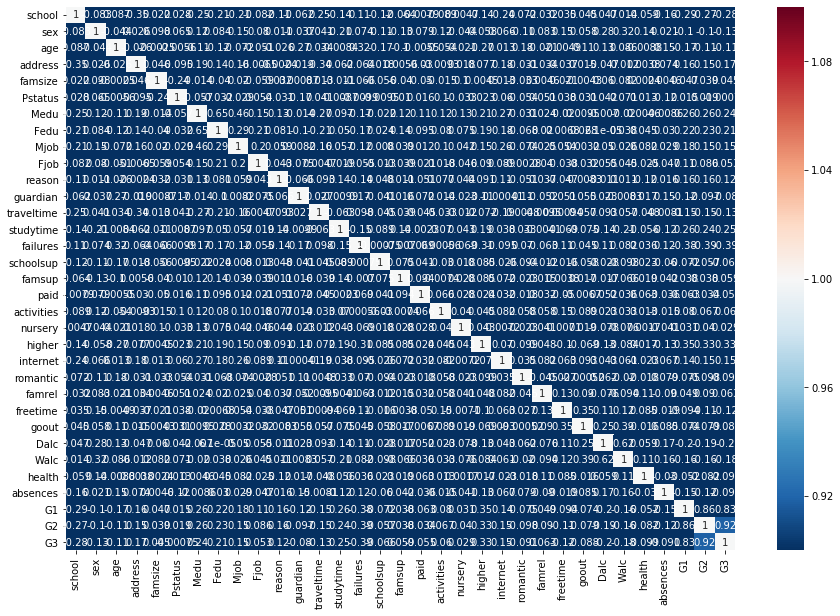

In [35]:
#Correclation
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=0, vmin=1, cmap="RdBu_r")

In [36]:
data = data.to_numpy()
X = data[:, :data.shape[1]-1]
y = data[:, data.shape[1]-1:]

In [37]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [38]:
#Scaling
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)

scaler = sklearn.preprocessing.StandardScaler()
X_test = scaler.fit(X_test).transform(X_test)

In [39]:
def errors_data(y_train, y_predict):
    mean_square_error = sklearn.metrics.mean_squared_error(y_train, y_predict)
    print("Root Mean Squared", mean_square_error)
    mean_absolut = sklearn.metrics.mean_absolute_error(y_train.ravel(), y_predict.ravel())
    print("Mean Absoulte Error", mean_absolut)
    return mean_square_error, mean_absolut

In [40]:
#Support vector Regression
param_grid = {
    'kernel':["rbf", "linear", "poly", "sigmoid"],
    'gamma':['auto', 'scale']
}
SVR = sklearn.svm.SVR()
grid_search_cv = sklearn.model_selection.GridSearchCV(SVR, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.1s finished


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.8229504948004126
Root Mean Squared 1.7880441039657502
Mean Absoulte Error 0.7457336291399563
Root Mean Squared 0.9457003518348794
Mean Absoulte Error 0.755108559617184


In [41]:
#Decision Tree Regression
param_grid = {
    'splitter':['best', 'random'],
    "max_depth": np.arange(1, 10, 1),
    "min_samples_split":np.arange(2,10,1),
}

decision_tree_regression = sklearn.tree.DecisionTreeRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(decision_tree_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.8193757578805249
Root Mean Squared 1.0205871134411368
Mean Absoulte Error 0.6370496255475565
Root Mean Squared 1.419852725782829
Mean Absoulte Error 0.7728435956496157


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    6.5s finished


In [42]:
#Random Forest Regression
param_grid = {
    'n_estimators':np.arange(1, 60, 1),
    'max_depth':np.arange(1,8,1),
}

random_forest_regression = sklearn.ensemble.RandomForestRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(random_forest_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 413 candidates, totalling 2065 fits


[Parallel(n_jobs=1)]: Done 2065 out of 2065 | elapsed:  4.9min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=57,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
0.8400393444814676
Root Mean Squared 1.540926811141172
Mean Absoulte Error 0.7708222112083217
Root Mean Squared 0.9090902187497183
Mean Absoulte Error 0.6706632766271552


In [43]:
#Ada boost regression
param_grid = {
    'n_estimators': np.arange(1,10,1),
    'learning_rate': np.arange(1,2,0.1),
    'loss':['linear', 'square', 'exponential']
}
ada_boost_regression = sklearn.ensemble.AdaBoostRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(ada_boost_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AdaBoostRegressor(base_estimator=None, learning_rate=1.6000000000000005,
                  loss='exponential', n_estimators=4, random_state=0)
0.7991791840443878
Root Mean Squared 1.5251480021200718
Mean Absoulte Error 0.7966813808627788
Root Mean Squared 1.1151550182225791
Mean Absoulte Error 0.7479614431314087


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:   35.4s finished


In [44]:
#linear regression
param_grid={
    'fit_intercept':[True, False],
    'normalize':[True, False],
}
linear_regression = sklearn.linear_model.LinearRegression()
grid_search_cv = sklearn.model_selection.GridSearchCV(linear_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.6s finished


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.8215590031075347
Root Mean Squared 1.64723893842092
Mean Absoulte Error 0.7920346438356457
Root Mean Squared 1.0469652420059994
Mean Absoulte Error 0.8059472229067017


In [45]:
#Gaussian Process Regression
param_grid={
    'kernel': [sklearn.gaussian_process.kernels.DotProduct(), sklearn.gaussian_process.kernels.WhiteKernel(), sklearn.gaussian_process.kernels.RBF()],
    'n_restarts_optimizer':np.arange(0,50,1),
    'normalize_y':[True, False]
}
gaussian_process_regression = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(gaussian_process_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 112.4min finished


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1), n_restarts_optimizer=12,
                         normalize_y=True, optimizer='fmin_l_bfgs_b',
                         random_state=0)
0.8217410756456783
Root Mean Squared 1.6471147498595669
Mean Absoulte Error 0.7914332311731513
Root Mean Squared 1.03599287484744
Mean Absoulte Error 0.8019329337344376


In [46]:
#neural network regression
hidden_layer_size = [(x, ) for x in np.arange(1, 100,1)]
param_grid={
    'hidden_layer_sizes': hidden_layer_size,
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
}
neural_network_regression = sklearn.neural_network.MLPRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(neural_network_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed: 11.0min finished


MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(83,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
0.8252595887046486
Root Mean Squared 1.6487888395934254
Mean Absoulte Error 0.7953580895464821
Root Mean Squared 1.077722899431315
Mean Absoulte Error 0.8190576792759393
